In [2]:
import os
import yaml
import copy
import numpy as np
from pathlib import Path

In [3]:
base_configs = []
for f in os.scandir('../configs/base_learners/'):
    if f.name.endswith('.yaml'):
        with open(f.path, 'r') as fh:
            config = yaml.load(fh, Loader=yaml.SafeLoader)
        base_configs.append((f.name.split('.')[0], config))

In [4]:
datasets = ['rumc', 'ictcf', 'cwz']

In [127]:
Path('../experiments/within_dataset/').mkdir(parents=True, exist_ok=True)
seed = np.random.randint(1000000)
for dataset in datasets:
    Path(os.path.join('../experiments/within_dataset/', dataset)).mkdir(parents=True, exist_ok=True)
    with open(os.path.join('../experiments/within_dataset/', dataset, 'meta.yaml'), 'w') as fh:
        yaml.dump({}, fh)
    for name, conf in base_configs:
        c = copy.deepcopy(conf)
        c['dataset']['name'] = dataset
        c['dataset']['target'] = 'PCR' if dataset in ['rumc', 'ictcf'] else 'DIAGNOSIS'
        if dataset == 'cwz':
            c['dataset']['test'] = dict(
                cv=dict(
                    test_size=0.2,
                    seed=seed
                )
            )
        elif dataset == 'ictcf':
            c['dataset']['test'] = dict(
                cv=dict(
                    part_name='cohort', 
                    part='c2'
                )
            )
        elif dataset == 'rumc':
            c['dataset']['test'] = dict(
                cv=dict(
                    part_name='part', 
                    part='test'
                )
            )
            if name not in ['lr', 'dart']:
                c['dataset']['early_stopping']['cv'] = dict(
                    part_name='part', 
                    part='val'
                )
        c['dataset']['feature_value_fraction_required'] = 0.1
        with open(os.path.join('../experiments/within_dataset/', dataset, f'{name}.yaml'), 'w') as fh:
            yaml.dump(c, fh)

In [119]:
datasets = {'ictcf': ['Union', 'Liyuan'], 'cwz': ['cwz', 'rumc']}
Path('../experiments/between_dataset/').mkdir(parents=True, exist_ok=True)
seed = np.random.randint(1000000)
for dataset, hospitals in datasets.items():
    for hospital in hospitals:
        path = os.path.join('../experiments/between_dataset/', dataset+'_'+hospital)
        Path(path).mkdir(parents=True, exist_ok=True)
        with open(os.path.join(path, 'meta.yaml'), 'w') as fh:
            yaml.dump({}, fh)
        for name, conf in base_configs:
            c = copy.deepcopy(conf)
            c['dataset']['name'] = dataset
            c['dataset']['target'] = 'PCR' if dataset in ['rumc', 'ictcf'] else 'DIAGNOSIS'
            c['dataset']['test'] = dict(cv=dict(part_name='hospital', part=hospital))
            c['dataset']['feature_value_fraction_required'] = 0.1
            with open(os.path.join(path, f'{name}.yaml'), 'w') as fh:
                yaml.dump(c, fh)

In [79]:
base_hyper_configs = []
for f in os.scandir('../configs/base_learners_hyperopt/'):
    if f.name.endswith('.yaml'):
        with open(f.path, 'r') as fh:
            config = yaml.load(fh, Loader=yaml.SafeLoader)
        base_hyper_configs.append((f.name.split('.')[0], config))

In [80]:
datasets = ['rumc', 'ictcf', 'cwz']

In [81]:
Path('../experiments/within_dataset_hyperopt/').mkdir(parents=True, exist_ok=True)
seed = np.random.randint(1000000)
for dataset in datasets:
    path = os.path.join('../experiments/within_dataset_hyperopt/', dataset)
    Path(path).mkdir(parents=True, exist_ok=True)
    with open(os.path.join(path, 'meta.yaml'), 'w') as fh:
        yaml.dump({}, fh)
    for name, conf in base_hyper_configs:
        c = copy.deepcopy(conf)
        c['dataset']['name'] = dataset
        c['dataset']['target'] = 'PCR' if dataset in ['rumc', 'ictcf'] else 'DIAGNOSIS'
        c['n_trials'] = 5
        c['dataset']['validation'] = dict(
            metric='roc_auc', 
            cv=dict(
                n_folds=5, 
                n_repeats=2
            )
        )
        if dataset == 'cwz':
            c['dataset']['test'] = dict(
                cv=dict(
                    test_size=0.2,
                    seed=seed
                )
            )
        elif dataset == 'ictcf':
            c['dataset']['test'] = dict(
                cv=dict(
                    part_name='cohort', 
                    part='c2'
                )
            )
        elif dataset == 'rumc':
            c['dataset']['test'] = dict(
                cv=dict(
                    part_name='part', 
                    part='test'
                )
            )
            if name not in ['lr', 'dart']:
                c['dataset']['early_stopping']['cv'] = dict(
                    part_name='part', 
                    part='val'
                )
        with open(os.path.join(path, f'{name}.yaml'), 'w') as fh:
            yaml.dump(c, fh)

In [82]:
datasets = {'ictcf': ['Union', 'Liyuan'], 'cwz': ['cwz', 'rumc']}
Path('../experiments/between_dataset_hyperopt/').mkdir(parents=True, exist_ok=True)
seed = np.random.randint(1000000)
for dataset, hospitals in datasets.items():
    for hospital in hospitals:
        path = os.path.join('../experiments/between_dataset_hyperopt/', dataset+'_'+hospital)
        Path(path).mkdir(parents=True, exist_ok=True)
        with open(os.path.join(path, 'meta.yaml'), 'w') as fh:
            yaml.dump({}, fh)
        for name, conf in base_hyper_configs:
            c = copy.deepcopy(conf)
            c['dataset']['name'] = dataset
            c['dataset']['target'] = 'PCR' if dataset in ['rumc', 'ictcf'] else 'DIAGNOSIS'
            c['dataset']['test'] = dict(cv=dict(part_name='hospital', part=hospital))
            c['n_trials'] = 5
            c['dataset']['validation'] = dict(
                metric='roc_auc', 
                cv=dict(
                    n_folds=5, 
                    n_repeats=2
                )
            )
            with open(os.path.join(path, f'{name}.yaml'), 'w') as fh:
                yaml.dump(c, fh)

In [137]:
Path('../experiments/within_dataset_missing/').mkdir(parents=True, exist_ok=True)
seed = np.random.randint(1000000)
for dataset in datasets:
    path = os.path.join('../experiments/within_dataset_missing/', dataset)
    Path(path).mkdir(parents=True, exist_ok=True)
    with open(os.path.join(path, 'meta.yaml'), 'w') as fh:
        yaml.dump({}, fh)
    for name, conf in base_configs:
        c = copy.deepcopy(conf)
        c['dataset']['name'] = dataset
        c['dataset']['target'] = 'PCR' if dataset in ['rumc', 'ictcf'] else 'DIAGNOSIS'
        if dataset == 'cwz':
            c['dataset']['test'] = dict(
                cv=dict(
                    test_size=0.2,
                    seed=seed
                )
            )
        elif dataset == 'ictcf':
            c['dataset']['test'] = dict(
                cv=dict(
                    part_name='cohort', 
                    part='c2'
                )
            )
        elif dataset == 'rumc':
            c['dataset']['test'] = dict(
                cv=dict(
                    part_name='part', 
                    part='test'
                )
            )
        c['dataset']['feature_value_fraction_required'] = 0.005
        c['pipeline']['missing_indicators'] = True
        with open(os.path.join(path, f'{name}.yaml'), 'w') as fh:
            yaml.dump(c, fh)

In [76]:
Path('../experiments/impute_predict_missing/').mkdir(parents=True, exist_ok=True)
impute_methods = ['MEAN', 'MEDIAN', 'MICE', 'KNN3', 'KNN5', 'KNN10', 'CONSTANT']
seed = np.random.randint(1000000)
for dataset in datasets:
    path = os.path.join('../experiments/impute_predict_missing/', dataset)
    Path(path).mkdir(parents=True, exist_ok=True)
    with open(os.path.join(path, 'meta.yaml'), 'w') as fh:
        yaml.dump({}, fh)
    for name, conf in base_configs:
        if name != 'rf_sklearn':
            continue
        for impute in impute_methods:
            c = copy.deepcopy(conf)
            c['dataset']['name'] = dataset
            c['dataset']['target'] = 'MISSING'
            if dataset == 'cwz':
                c['dataset']['test'] = dict(
                    cv=dict(
                        test_size=0.2,
                        seed=seed
                    )
                )
            elif dataset == 'ictcf':
                c['dataset']['test'] = dict(
                    cv=dict(
                        part_name='cohort', 
                        part='c2'
                    )
                )
            elif dataset == 'rumc':
                c['dataset']['test'] = dict(
                    cv=dict(
                        part_name='part', 
                        part='test'
                    )
                )
            c['dataset']['feature_value_fraction_required'] = 0.005
            c['pipeline']['imputation']['numeric'] = impute
            c['human_name'] = impute
            with open(os.path.join(path, f'{name}_{impute}.yaml'), 'w') as fh:
                yaml.dump(c, fh)

In [78]:
Path('../experiments/predict_with_impute/').mkdir(parents=True, exist_ok=True)
impute_methods = ['MEAN', 'MEDIAN', 'MICE', 'KNN3', 'KNN5', 'KNN10', 'CONSTANT', 'NONE']
seed = np.random.randint(1000000)
for dataset in datasets:
    path = os.path.join('../experiments/predict_with_impute/', dataset)
    Path(path).mkdir(parents=True, exist_ok=True)
    with open(os.path.join(path, 'meta.yaml'), 'w') as fh:
        yaml.dump({}, fh)
    for name, conf in base_configs:
        for impute in impute_methods:
            c = copy.deepcopy(conf)
            c['dataset']['name'] = dataset
            c['dataset']['target'] = 'PCR' if dataset in ['rumc', 'ictcf'] else 'DIAGNOSIS'
            if dataset == 'cwz':
                c['dataset']['test'] = dict(
                    cv=dict(
                        test_size=0.2,
                        seed=seed
                    )
                )
            elif dataset == 'ictcf':
                c['dataset']['test'] = dict(
                    cv=dict(
                        part_name='cohort', 
                        part='c2'
                    )
                )
            elif dataset == 'rumc':
                c['dataset']['test'] = dict(
                    cv=dict(
                        part_name='part', 
                        part='test'
                    )
                )
            c['dataset']['feature_value_fraction_required'] = 0.005
            c['pipeline']['imputation']['numeric'] = impute
            c['row_name'] = impute
            with open(os.path.join(path, f'{name}_{impute}.yaml'), 'w') as fh:
                yaml.dump(c, fh)

In [34]:
from covidcf.config.meta import MetaConfig, MetaSchema

In [236]:
def load_config(path: Path):
    with open(path, 'r') as fh:
        config = yaml.load(fh, Loader=yaml.SafeLoader)
    return path.stem, config

def generate_experiment(name: str, configs, datasets, do_hyperopt: bool, generate_configs_callback, overview_metrics=None, 
                        overview_x='model', overview_row=None, plot_shap=False, n_hyperopt_trials: int = 5, hyperopt_cv=None):
    base_path = Path('../experiments/')
    experiment_path = base_path.joinpath(name)
    experiment_path.mkdir(parents=True, exist_ok=True)
    
    configs_path = Path('../configs/base_learners_hyperopt/') if do_hyperopt else Path('../configs/base_learners/')
    base_configs = [load_config(path) for path in configs_path.iterdir() if path.stem in configs or configs == 'all']

    seed = np.random.randint(1000000)
    if datasets == 'all':
        datasets = ['rumc', 'ictcf', 'cwz']
        test_cvs = {'cwz': dict(test_size=0.2, seed=seed), 'ictcf': dict(part_name='cohort', part='c2'), 'rumc': dict(part_name='part', part='test')}
    elif datasets == 'cross':
        datasets = ['ictcf_Union', 'ictcf_Liyuan', 'cwz_cwz', 'cwz_rumc']
        test_cvs = {'ictcf_Union': dict(part_name='hospital', part='Union'), 
                    'ictcf_Liyuan': dict(part_name='hospital', part='Liyuan'), 
                    'cwz_cwz': dict(part_name='hospital', part='cwz'), 
                    'cwz_rumc': dict(part_name='hospital', part='rumc')}
    
    overview_metrics = ['roc_auc', 'accuracy'] if overview_metrics is None else overview_metrics
    meta = MetaConfig(overview=MetaConfig.OverviewConfig(x=overview_x, row=overview_row, metrics=overview_metrics), plot_shap=plot_shap)
    
    hyperopt_cv = dict(n_folds=5, n_repeats=2) if hyperopt_cv is None else hyperopt_cv
    
    for dataset in datasets:
        path = experiment_path.joinpath(dataset)
        path.mkdir(parents=True, exist_ok=True)
        with open(path.joinpath('meta.yaml'), 'w') as fh:
            yaml.dump(MetaSchema.dump(meta), fh)
        for name, conf in base_configs:
            c = copy.deepcopy(conf)
            c['dataset']['name'] = dataset.split('_')[0]
            c['dataset']['target'] = 'PCR' if dataset in ['rumc', 'ictcf'] else 'DIAGNOSIS'
            c['dataset']['test'] = dict(cv=test_cvs[dataset])
            
            if do_hyperopt:
                c['n_trials'] = n_hyperopt_trials
                c['dataset']['validation'] = dict(metric='roc_auc', cv=hyperopt_cv)
            
            experiments_configs = generate_configs_callback(dataset, name, c)
            for experiment_name, experiment_config in experiments_configs:
                with open(path.joinpath(f'{experiment_name}.yaml'), 'w') as fh:
                    yaml.dump(experiment_config, fh)

In [232]:
def gen_configs(dataset, config_name, config):
    impute_methods = ['MEAN', 'MEDIAN', 'MICE', 'KNN3', 'KNN5', 'KNN10', 'CONSTANT', 'NONE']
    for impute in impute_methods:
        c = copy.deepcopy(config)
        c['dataset']['feature_value_fraction_required'] = 0.005
        c['pipeline']['imputation']['numeric'] = impute
        c['meta'].update(dict(impute_method=impute))
        yield f'{config_name}_{impute}', c
generate_experiment('predict_with_impute', configs='all', datasets='cross', do_hyperopt=False, generate_configs_callback=gen_configs, 
                    overview_row='impute_method')

In [237]:
def gen_configs(dataset, config_name, config):
    c = copy.deepcopy(config)
    c['parameters'] = dict(estimator=dict(base_estimator=c['parameters']['estimator']))
    c['pipeline']['estimator_type'] = 'SHAP_ZERO'
    yield f'{config_name}', c
generate_experiment('shap_zeroing', configs=['gbdt', 'dart', 'goss', 'rf'], datasets='cross', do_hyperopt=False, generate_configs_callback=gen_configs)
generate_experiment('shap_zeroing_hyperopt', configs=['gbdt', 'dart', 'goss', 'rf'], datasets='cross', do_hyperopt=True, generate_configs_callback=gen_configs)

In [239]:
def gen_configs(dataset, config_name, config):
    c = copy.deepcopy(config)
    c['parameters'] = dict(estimator=dict(base_estimator=c['parameters']['estimator']))
    c['parameters']['estimator']['n_repeat'] = 50
    c['pipeline']['estimator_type'] = 'REP_IMPUTE'
    yield f'{config_name}', c
    if config_name == 'gbdt':
        c = copy.deepcopy(config)
        c['meta']['model'] = 'Baseline'
        yield f'{config_name}_base', c
generate_experiment('test_time_impute', configs=['gbdt', 'dart', 'goss', 'rf'], datasets='cross', do_hyperopt=False, generate_configs_callback=gen_configs, plot_shap=True)

In [95]:
Path('../configs/base_learners_hyperopt/dart.yaml').stem

'dart'

In [143]:
np.isnan(np.random.rand(10, 10)).shape

(10, 10)

In [78]:
os.path.exists(os.path.join('../experiments/within_dataset/', dataset))

True

In [58]:
import pandas as pd
pd.read_pickle('../data/processed/cwz.pkl').Meta.hospital.value_counts()

cwz     262
rumc    172
Name: hospital, dtype: int64

In [110]:
s = (~pd.read_pickle('../data/processed/rumc.pkl').Input.Clinical.isna()).sum()

In [111]:
pd.read_pickle('../data/processed/rumc.pkl').shape

(799, 654)

In [112]:
s.sort_values()[::-1].head(40)

sex                                              508
age                                              508
MCV                                              163
ERYTROCYTEN                                      163
RED CELL DISTRIBUTION WIDTH (RDW)                163
HEMATOCRIET                                      163
HEMOGLOBINE                                      163
TROMBOCYTEN                                      163
LEUK                                             163
MCH                                              163
MCHC                                             163
KREATININE                                       163
MDRD-GFR                                         162
CKD-EPI-GFR, ML/MIN/1.73 M2                      162
ALAT                                             141
CRP                                              128
LDH                                              128
ALKALISCHE FOSFATASE                             124
KALIUM                                        

In [114]:
799*0.12

95.88

In [100]:
cwz = pd.read_pickle('../data/processed/cwz.pkl')

In [105]:
(~cwz[cwz.Meta.hospital == 'rumc'].Input.Clinical.isna()).sum().sort_values()[::-1]

adm_hosp                                                   172
adm_presenting_symptoms#Shortness_of_breath_dyspnea        172
dem_pat_gender                                             172
med_hist_other#Cardiovascular                              172
med_hist_other#DM                                          172
med_hist_other#Obesity                                     172
med_hist_other#Pulmonary_Pathology                         172
med_hist_other#Immunodeficiency                            172
med_hist_other#Malignancy                                  172
med_hist_other#Other                                       172
adm_presenting_symptoms#Fever__38_C                        172
adm_presenting_symptoms#Cough_without_sputum_production    172
adm_presenting_symptoms#Chest_pain                         172
adm_presenting_symptoms#Abdominal_pain                     172
dem_pat_age_at_inclusion                                   172
adm_resp_rate                                          

In [130]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

In [132]:
rf = RandomForestClassifier().fit(np.random.rand(30, 10), np.round(np.random.rand(30, 3)))

In [243]:
import joblib
import os
import yaml
import pandas as pd
import numpy as np
import shap
from covidcf.evaluation.base import get_cat_codes
dfs = []
experiments_path = '../experiments/within_dataset/ictcf/'
shap_df = []
is_multi = False
for f in os.scandir(experiments_path):
    if f.name != 'meta.yaml' and f.name.startswith('result_'):
        print(f.name)
        path_to_file, filename = os.path.split(f.path)
        config_path = os.path.join(path_to_file, f'{filename.split(".")[0].replace("result_", "")}.yaml')
        with open(config_path, 'r') as fh:
            config_dict = yaml.load(fh, Loader=yaml.SafeLoader)
        data = joblib.load(f.path)
        print(len(data['preds_proba']))
        print(data.keys())
        if not isinstance(data['preds_proba'], list):
            try:
                explainer = shap.TreeExplainer(data['pipeline'].steps[-1][1])
                shap_values = explainer(data['X_test'])[:, :, 1]
                vis_idx = data['X_test'].columns.str.startswith('Visual')
                mean_abs_missing = np.abs(shap_values.values[:, ~vis_idx] * data['X_test'].isna().values[:, ~vis_idx]).mean()
                mean_abs_present = np.abs(shap_values.values[:, ~vis_idx] * (~data['X_test'].isna()).values[:, ~vis_idx]).mean()
                if np.any(vis_idx):
                    mean_abs_vis = np.abs(shap_values.values[:, vis_idx]).mean()
                
                shap_df.append({'model': config_dict['human_name'], 'type': 'missing', 'value': mean_abs_missing})
                shap_df.append({'model': config_dict['human_name'], 'type': 'present', 'value': mean_abs_present})
                if np.any(vis_idx):
                    shap_df.append({'model': config_dict['human_name'], 'type': 'visual', 'value': mean_abs_vis})
                
            except:
#                 explainer = shap.KernelExplainer(data['pipeline'].predict_proba, data=data['X_test'])
                pass
            
            data = pd.DataFrame({'true_0': get_cat_codes(data['y_test']), 'pred_0': data['preds_proba']})
        else:
            is_multi = True
            preds = data['preds_proba']
            print([i for i in range(len(preds)) if preds[i].shape[1] == 1])
            data_dict = {f'pred_{i}': preds[i][:, 1] for i in range(len(preds)) if preds[i].shape[1] == 2}
            data_dict.update({f'true_{i}': np.array(data['y_test'])[:, i] for i in range(len(preds))})
            data = pd.DataFrame(data_dict)
        assert all(not (df.model == config_dict['human_name']).any() for df in dfs), f'{[df.model.unique() for df in dfs]}, {config_dict["human_name"]}'
        data['model'] = config_dict['human_name']
        dfs.append(data)

In [244]:
df = pd.concat(dfs, ignore_index=True)
df

ValueError: No objects to concatenate

In [223]:
shap_df = pd.DataFrame(shap_df)
shap_df

,model,type,value
0,DART,missing,0.007110
1,DART,present,0.022265
2,DART,visual,0.050394
3,GBDT,missing,0.015296
4,GBDT,present,0.045737
5,GBDT,visual,0.092899
6,GOSS,missing,0.014053
7,GOSS,present,0.041444
8,GOSS,visual,0.072154
9,RF,missing,0.010244


<AxesSubplot:xlabel='model', ylabel='value'>

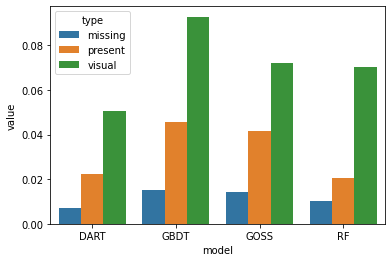

In [224]:
import seaborn as sns
sns.barplot(data=shap_df, x='model', y='value', hue='type')

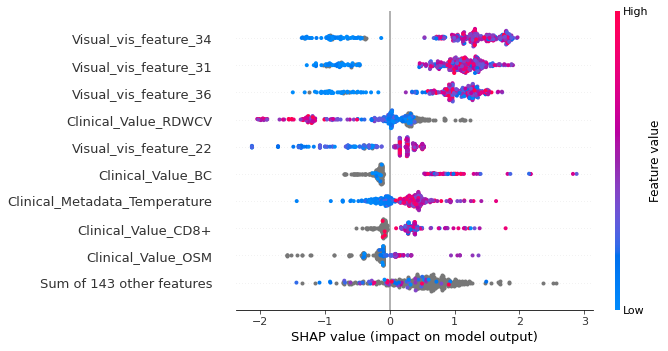

In [225]:
shap.plots.beeswarm(shap_values)

In [226]:
def bootstrap(a, n_repeat, n_resample, metric):
    values = []
#     print(a.shape)
    for i in range(n_repeat):
        indices = np.random.choice(len(a), size=n_resample)
        a_resampled = a[indices]
#         print(a_resampled.shape)
        values.append(metric(a_resampled))
    return values

In [241]:
def compute_metrics(df, metrics, resample=False):
    trues = df.columns[df.columns.str.startswith('true')]
    preds = trues.str.replace('true', 'pred')

    metric_values = []
    
    for model, model_df in df.groupby('model'):
        for col_true, col_pred in zip(trues, preds):
            if col_pred not in df.columns:
                continue
            true = model_df[col_true]
            pred = model_df[col_pred]
            for metric_name, m in metrics.items():
                def safe_m(a):
                    try:
                        a = a.T
                        return m(a[0], a[1])
                    except:
                        try:
                            return m(a[0], np.round(a[1]))
                        except:
                            return np.nan
                a = np.array(list(zip(true.values, pred.values)))
                metric_value = safe_m(a)
                if np.isnan(metric_value):
                    continue
    #             print(true.values)
    #             metric_value = m(true.values, pred.values)
    #             print(np.stack([true.values, pred.values]).shape)
                metric_bootstrapped = bootstrap(a, 10000, len(true), safe_m)
                if resample:
                    for i in range(1500):
                        metric_values.append({'model': model, 'metric': metric_name, 'feat': col_true.split('_')[1], 'value': np.random.choice(metric_bootstrapped), 
                                              'lb': np.nanpercentile(metric_bootstrapped, 2.5), 
                                              'ub': np.nanpercentile(metric_bootstrapped, 97.5)})
                else:
                    metric_values.append({'model': model, 'metric': metric_name, 'feat': col_true.split('_')[1], 'value': metric_value, 
                                              'lb': np.nanpercentile(metric_bootstrapped, 2.5), 
                                              'ub': np.nanpercentile(metric_bootstrapped, 97.5)})
    return pd.DataFrame(metric_values)

In [242]:
df

NameError: name 'df' is not defined

In [240]:
from sklearn.metrics import roc_auc_score, accuracy_score
r = compute_metrics(df, {'AUC': roc_auc_score, 'Accuracy': accuracy_score}, resample=False)

NameError: name 'compute_metrics' is not defined

In [275]:
r

,model,metric,feat,value,lb,ub
0,DART,AUC,0,0.862541,0.797822,0.880194
1,DART,AUC,0,0.855368,0.797822,0.880194
2,DART,AUC,0,0.843487,0.797822,0.880194
3,DART,AUC,0,0.851829,0.797822,0.880194
4,DART,AUC,0,0.827378,0.797822,0.880194
...,...,...,...,...,...,...
14995,RF,Accuracy,0,0.652422,0.649573,0.746439
14996,RF,Accuracy,0,0.695157,0.649573,0.746439
14997,RF,Accuracy,0,0.635328,0.649573,0.746439
14998,RF,Accuracy,0,0.746439,0.649573,0.746439


<AxesSubplot:>

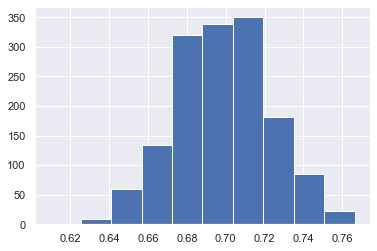

In [277]:
r[(r.model == 'RF') & (r.metric == 'Accuracy')].value.hist()

In [278]:
def grouped_bar_plot(df):
    width = 0.8
    n_metrics = len(df.metric.unique())
    n_models = len(df.model.unique())
    x = np.arange(n_models)*(n_metrics*width+0.2)
    for i, (metric, metric_df) in enumerate(df.groupby('metric')):
        err = np.stack([metric_df.value.values-metric_df.lb.values, metric_df.ub.values-metric_df.value.values])
        print(err.shape)
        plt.bar(x+i*width, metric_df.value.values, width=width, label=metric, yerr=err)
#         plt.errorbar(x+i*width, metric_df.value.values, yerr=np.abs(metric_df.ub-metric_df.value))#, yerr=np.stack([metric_df.lb, metric_df.ub]))
#         print(np.stack([metric_df.lb, metric_df.ub]).shape)
    plt.xticks(x+(n_metrics*width)/2-width/2, df.model.unique())
    plt.xlabel('Model')
    plt.ylabel('Metric value')
    plt.legend()

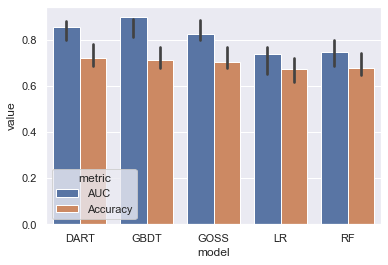

In [279]:
g = sns.barplot(data=r, x='model', y='value', hue='metric', estimator=lambda x: np.random.choice(np.array(x)))

In [235]:
g.patches

(2, 5)
(2, 5)


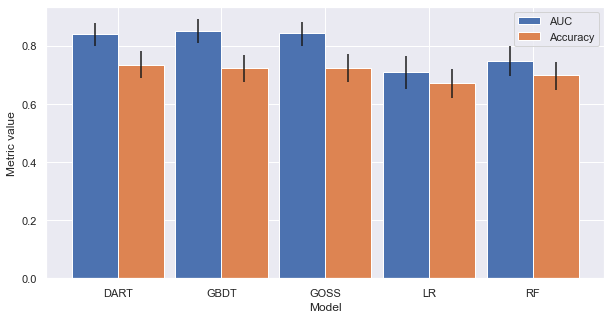

In [280]:
import matplotlib.pyplot as plt
sns.set()
r = compute_metrics(df, {'AUC': roc_auc_score, 'Accuracy': accuracy_score}, resample=False)
plt.figure(figsize=(10, 5))
grouped_bar_plot(r)

0    0.799282
Name: lb, dtype: float64
1    0.823163
Name: lb, dtype: float64
2    0.798693
Name: lb, dtype: float64
3    0.650129
Name: lb, dtype: float64
4    0.698631
Name: lb, dtype: float64


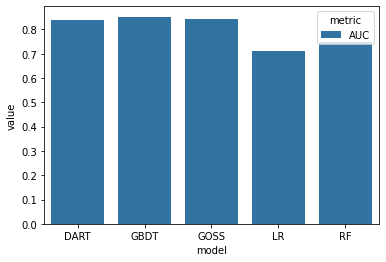

In [319]:
def est(x):
    print(r.loc[x.index].lb)
    return np.mean(x)

bar = sns.barplot(data=r, x='model', y='value', hue='metric', estimator=est)

In [323]:
for b in bar.patches:
    x2, y2 = x0,y0+h

<AxesSubplot:xlabel='model', ylabel='value'>

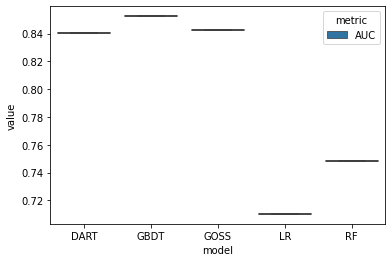

In [314]:
sns.boxplot(data=r, x='model', y='value', hue='metric')

In [272]:
import matplotlib.pyplot as plt
def plot_estimations(estimations):
    if len(list(estimations.values())[0]) > 1:
        sns.

<AxesSubplot:>

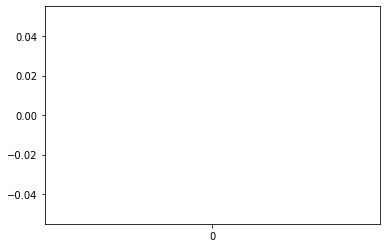

In [273]:
import seaborn as sns
sns.barplot()

In [268]:
for model, group_df in df.groupby('model'):
    print(model)

RF


In [159]:
df = pd.concat(dfs, ignore_index=True)

In [165]:
np.stack([np.random.rand(10), np.random.rand(10)]).shape

(2, 10)

In [39]:
import pandas as pd
ictcf = pd.read_pickle('../data/processed/ictcf.pkl')

In [41]:
X = ictcf.Input.Clinical.copy()
y = ictcf.Target['pcr'].copy()

In [163]:
X['vis'] = ictcf.Input.Visual.mean(axis='columns')

In [164]:
X = X[['vis']]

In [47]:
import re
for col in X.select_dtypes(include=['category']):
    X[col] = X[col].cat.codes
    X.loc[X[col] < 0, col] = np.nan
y = y.cat.codes
X.columns = [re.sub(r'[^0-9a-zA-Z_-]+ ', '', '_'.join(col).strip()) for col in X.columns.values]

In [84]:
# test_idx = ictcf.Meta.cohort == 'c2'
test_idx = ictcf.Meta.hospital == 'Union'
X_train, X_test = X.loc[~test_idx], X.loc[test_idx]
y_train, y_test = y.loc[~test_idx], y.loc[test_idx]

In [85]:
from lightgbm.sklearn import LGBMClassifier

In [86]:
from bonsai.ensemble.paloboost import PaloBoost
from bonsai.ensemble.paloforest import PaloForest
b = PaloForest(n_paloboost=20, n_estimators=400)
b.fit(np.array(X_train), np.array(y_train))

c:\users\roel\.virtualenvs\diagcovid-ckc2berq\lib\site-packages\numpy\lib\nanfunctions.py:1390: RuntimeWarning: All-NaN slice encountered
  overwrite_input, interpolation)


In [87]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, b.predict_proba(np.array(X_test)))

0.6983195298560776

In [224]:
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import AdaBoostClassifier, StackingClassifier, VotingClassifier, ExtraTreesClassifier
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
# from sklearn.linear_model import BayesianRidge
from scipy.stats import randint

clf = BaggingClassifier(LGBMClassifier(n_jobs=-1, n_estimators=15, max_depth=1), n_estimators=3000, max_samples=0.8)
# clf2 = LGBMClassifier(n_jobs=-1)
# clf = VotingClassifier([('bagging', clf), ('boosting', clf2)], voting='soft')
# clf = BaggingClassifier(make_pipeline(SimpleImputer(), ExtraTreesClassifier(n_estimators=20, max_depth=1)), n_estimators=100)
rs = RandomizedSearchCV(clf, param_distributions={
    'base_estimator__n_estimators': randint(low=2, high=30), 
#     'base_estimator__max_depth': randint(low=0, high=20)
}, cv=4, n_iter=30)
clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=LGBMClassifier(max_depth=1, n_estimators=15),
                  max_samples=0.8, n_estimators=3000)

In [225]:
from sklearn.metrics import roc_auc_score
clf.score(X_test, y_test)
roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])

0.7112793615577645

In [175]:
from sklearn.ensemble import BaggingClassifier
clf = LGBMClassifier(n_jobs=-1)
clf.fit(X_train, y_train)

LGBMClassifier()

In [119]:
from sklearn.metrics import roc_auc_score
clf.score(X_test, y_test)
roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])

0.6733189016093886

In [215]:
from sklearn.metrics import accuracy_score
idx = (~ictcf.Input.Visual.mean(axis='columns').isna()) & (ictcf.Meta.cohort == 'c2')
roc_auc_score(y_test.loc[idx], ictcf.Input.Visual.mean(axis='columns').loc[idx])

0.7478413815158299

In [219]:
from sklearn.metrics import accuracy_score
idx = (~ictcf.Input.Visual.mean(axis='columns').isna()) & (ictcf.Meta.hospital == 'Union')
roc_auc_score(y.loc[idx], ictcf.Input.Visual.mean(axis='columns').loc[idx])

0.8446775774739937

In [214]:
from sklearn.metrics import accuracy_score
idx = (~ictcf.Input.Visual.mean(axis='columns').isna()) & (ictcf.Meta.cohort == 'c2')
preds = ictcf.Input.Visual.mean(axis='columns').loc[idx]
accuracy_score(y_test.loc[idx].cat.codes, np.round(((preds-preds.min())/(preds.max()-preds.min()))))

0.5146198830409356

In [212]:
np.round(((preds-preds.min())/(preds.max()-preds.min())))

1170    0.0
1171    1.0
1172    0.0
1173    0.0
1174    0.0
       ... 
1516    1.0
1517    0.0
1518    1.0
1519    0.0
1520    1.0
Length: 342, dtype: float64

In [205]:
ictcf.Input.Visual.mean(axis='columns')

0       1.530727
1       2.540437
2       1.819481
3       1.644178
4       2.073250
          ...   
1516    2.585665
1517    2.026200
1518    2.383986
1519    0.950276
1520    3.513498
Length: 1521, dtype: float64